In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']
algorithms = [('DeepNovo', 'deepnovo'), ('Novor', 'novor'), ('DirecTag', 'direcTag'), ('PEAKS', 'peaks')]

## Number of peptides in each pool compared to the number of identifiable peptides compared to the number of predicted peptides compared to the number of predicted and identified peptides

In [42]:
for alg, algFile in algorithms:
    entries = []
    for pool in pools:
        # Load the data
        raw_data =pd.read_csv(
                f"../../Data/Datasets/{pool}/Thermo_SRM_{pool}_01_01_3xHCD-1h-R2-tryptic/msmsScans.txt",
                sep='\t', index_col=None)
        parsed_data = pd.read_csv(f'../../Data/ParsingResults/{pool}/{algFile}_results_raw.tsv', sep='\t', index_col=None)
        scored_data = pd.read_csv(f'../../Data/ParsingResults/{pool}/{algFile}_results.tsv', sep='\t', index_col=None)

        # Get the number of peptides
        numPeptides = raw_data.shape[0]

        # Get the number of identifiable peptides
        numIdentifiable = raw_data.query('Identified == \'+\'').shape[0]

        if alg == 'DirecTag':
            # Get the number of predicted peptides
            numPredicted = parsed_data['ID'].nunique()
        else:
            # Get the number of predicted peptides
            numPredicted = parsed_data.shape[0]

        if alg == 'DirecTag':
            # Get the number of predicted peptides
            numPredictedIdentified = scored_data['ID'].nunique()
        else:
            # Get the number of predicted peptides
            numPredictedIdentified = scored_data.shape[0]


        entries.append([pool, numPeptides, numIdentifiable, numPredicted, numPredictedIdentified])
    data_df = pd.DataFrame(entries, columns=['Pool', 'Total', 'Identifiable', 'Predicted', 'Predicted and Identified'])
    print(f"{alg} - absolute",'\n', data_df, '\n\n')
    # turn the data into percentages
    data_df['Identifiable'] = data_df['Identifiable'] / data_df['Total'] * 100
    data_df['Predicted'] = data_df['Predicted'] / data_df['Total'] * 100
    data_df['Predicted and Identified'] = data_df['Predicted and Identified'] / data_df['Total'] * 100
    data_df['Total'] = 100
    print(f"{alg} - relative",'\n', data_df, '\n\n')

    # calculate average of percentages
    avg_identifiable = data_df['Identifiable'].mean()
    avg_predicted = data_df['Predicted'].mean()
    avg_predicted_identified = data_df['Predicted and Identified'].mean()
    print(f"{alg} - average", '\n', avg_identifiable, avg_predicted, avg_predicted_identified, '\n\n')




DeepNovo - absolute 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49  50154         33910      43014                     30256
1  Pool_52  49044         31605      42127                     27962
2  Pool_60  49461         31502      34608                     24707 


DeepNovo - relative 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49    100     67.611756  85.763847                 60.326195
1  Pool_52    100     64.442134  85.896338                 57.014110
2  Pool_60    100     63.690585  69.970280                 49.952488 


DeepNovo - average 
 65.24815796246783 80.54348831554103 55.76426430535957 


Novor - absolute 
       Pool  Total  Identifiable  Predicted  Predicted and Identified
0  Pool_49  50154         33910      50115                     33877
1  Pool_52  49044         31605      49026                     31591
2  Pool_60  49461         31502      49452                     31499 


Novor - relative 
    

## Boxplot of the identity score

Processing DeepNovo on Pool_49
Number of peptides: 30256
Processing DeepNovo on Pool_52
Number of peptides: 27962
Processing DeepNovo on Pool_60
Number of peptides: 24707


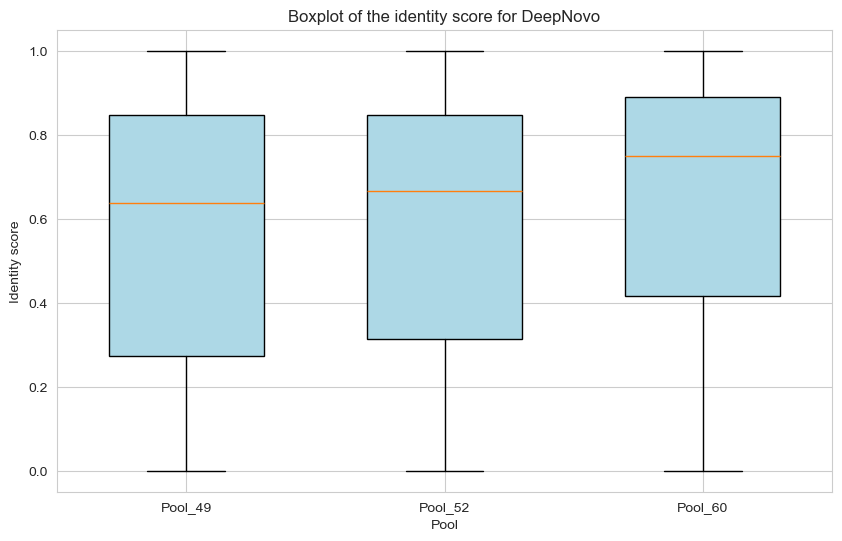

Processing Novor on Pool_49
Number of peptides: 33877
Processing Novor on Pool_52
Number of peptides: 31591
Processing Novor on Pool_60
Number of peptides: 31499


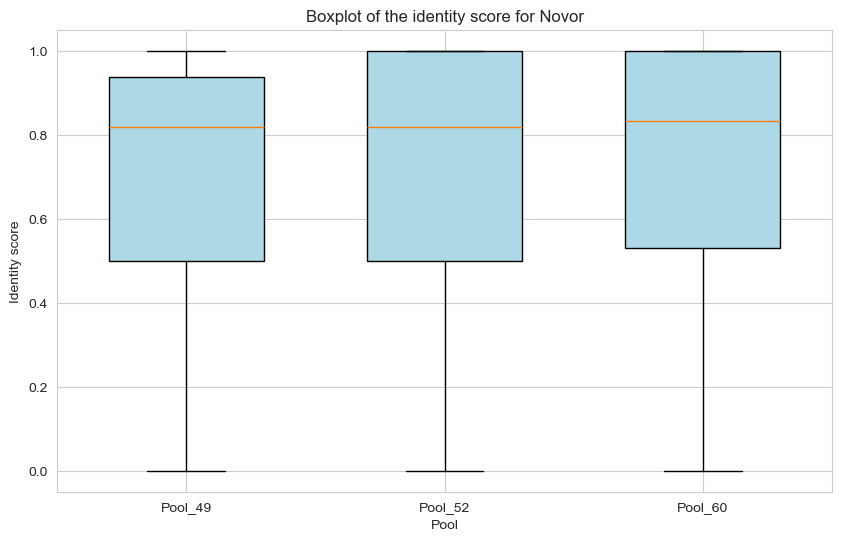

Processing DirecTag on Pool_49
Number of peptides: 251849
Processing DirecTag on Pool_52
Number of peptides: 230256
Processing DirecTag on Pool_60
Number of peptides: 231499


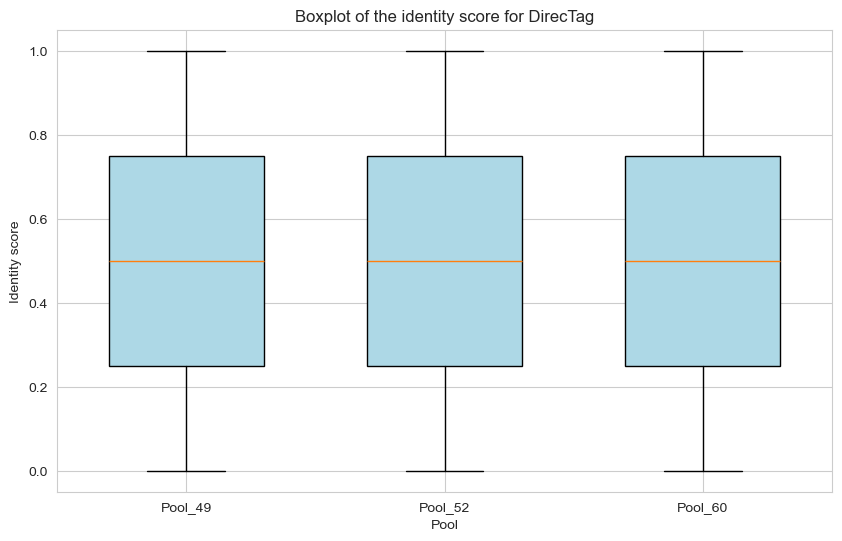

Processing PEAKS on Pool_49
Number of peptides: 28481
Processing PEAKS on Pool_52
Number of peptides: 30035
Processing PEAKS on Pool_60
Number of peptides: 30360


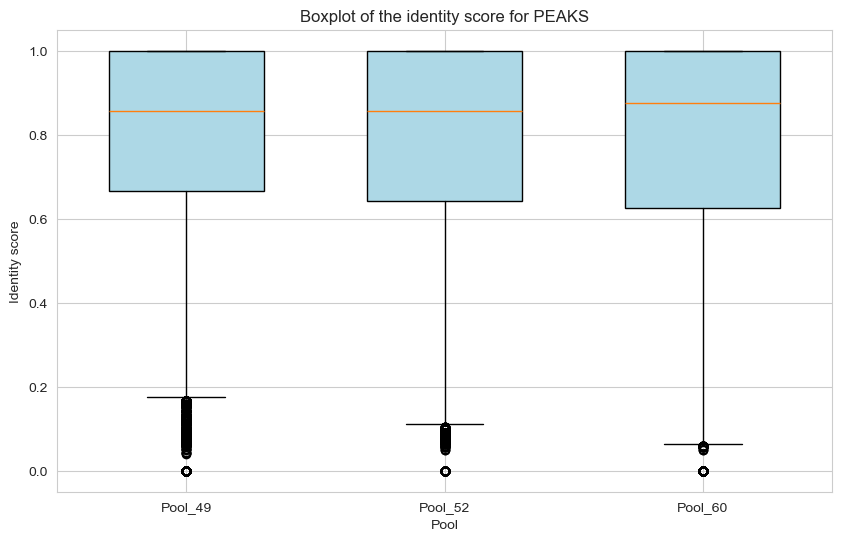

In [15]:
for alg, algFile in algorithms:
    plot = plt.figure(figsize=(10, 6))
    for pool in pools:
        print(f'Processing {alg} on {pool}')
        # Load the data
        scored_data = pd.read_csv(f'../../Data/ScoringResults/{pool}/{algFile}_scored.tsv', sep='\t', index_col=0)
        # Get the number of peptides
        numPeptides = scored_data.shape[0]
        print(f'Number of peptides: {numPeptides}')
        # print boxplot of the identity score
        plt.boxplot(scored_data['Identity'], positions=[pools.index(pool)], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        #plt.text(pools.index(pool), 0.5, f'{numPeptides}', horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.xticks(range(len(pools)), pools)
    plt.title(f'Boxplot of the identity score for {alg}')
    plt.ylabel('Identity score')
    plt.xlabel('Pool')
    plt.show()
